This notebook calculates the Mahalanobis distance between points on a pca. 
I will document more about what Mahalanobis distance is and how it is calculated in this notebook.

In [1]:
import itertools
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
from scipy.spatial.distance import mahalanobis
from scipy.stats import ttest_ind

In [2]:
# set the path to the data
sum_aggregated_data_pca_path = pathlib.Path(
    "../../data/6.analysis_results/sum_aggregated_pca.parquet"
).resolve(strict=True)

# read the data
sum_aggregated_data_pca = pd.read_parquet(sum_aggregated_data_pca_path)
print(sum_aggregated_data_pca.shape)
sum_aggregated_data_pca.head()

(42, 44)


,Metadata_genotype,Metadata_replicate,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,High-Severity,1,-2.612687,2.480900,1.038433,-2.124206,1.848401,-0.138879,0.610879,-1.240955,...,1.737607,0.665385,-1.508575,-0.002393,-1.269638,0.005696,0.640564,0.873191,-0.304305,-9.020562e-16
1,High-Severity,10,1.744949,8.499953,2.922399,-1.102377,-0.962470,1.636088,1.463812,2.400998,...,-0.030647,0.118004,-1.435196,2.127940,-0.683266,-0.594841,-0.847429,-0.543167,0.226587,-6.106227e-16
2,High-Severity,11,1.118178,10.555786,1.918724,-1.821125,1.678552,-0.607047,-1.070299,-0.952239,...,0.164507,1.273944,0.585109,0.301258,-0.100187,0.409482,0.292690,-0.419133,0.090811,-1.665335e-16
3,High-Severity,12,-0.267551,7.238575,3.193898,-0.921462,-1.421467,3.201197,0.876403,1.133883,...,-0.788146,0.724145,-0.588942,0.030300,0.712927,0.415672,2.116853,-0.583968,0.414338,-6.661338e-16
4,High-Severity,13,-0.810176,6.274105,4.030843,0.668752,-0.999091,3.636388,0.282499,-2.773985,...,-1.040199,-1.076102,-0.000303,-0.058833,-0.736013,0.174054,-0.917179,1.114349,0.339969,3.400058e-16


# Mahalanobis Distance
For more in depth information on Mahalanobis distance, please refer to this [link](https://medium.com/@the_daft_introvert/mahalanobis-distance-5c11a757b099).
Mahalanobis distance is a measure of the distance between a point P and a distribution D. 
It is a multi-dimensional generalization of the idea of measuring how many standard deviations away P is from the mean of D. 
This distance is zero if P is at the mean of D, and grows as P moves away from the mean along each principal component axis.
The formula for Mahalanobis distance is given by:
### $D^2 = (x - \mu)^T \Sigma^{-1} (x - \mu)$
where:
- $D$ is the Mahalanobis distance

## Caluclating Mahalanobis Distance on PCA components 1 and 2
Here I calculate the Mahalanobis distance between the points on the first two principal components of the data for each of the three genotypes.

In [3]:
# split the genotypes
high_severity = sum_aggregated_data_pca[
    sum_aggregated_data_pca["Metadata_genotype"] == "High-Severity"
]
low_severity = sum_aggregated_data_pca[
    sum_aggregated_data_pca["Metadata_genotype"] == "Mid-Severity"
]
wt = sum_aggregated_data_pca[
    sum_aggregated_data_pca["Metadata_genotype"] == "Wild Type"
]
print(len(high_severity), len(low_severity), len(wt))

14 14 14


In [4]:
# drop the the Metadata columns
high_severity = high_severity.drop(columns=["Metadata_genotype", "Metadata_replicate"])
low_severity = low_severity.drop(columns=["Metadata_genotype", "Metadata_replicate"])
wt = wt.drop(columns=["Metadata_genotype", "Metadata_replicate"])
# convert the df to coordinates
high_severity_coords = high_severity.to_numpy()
low_severity_coords = low_severity.to_numpy()
wt_coords = wt.to_numpy()
print(high_severity_coords.shape, low_severity_coords.shape, wt_coords.shape)

(14, 42) (14, 42) (14, 42)


#### High-Severity

In [5]:
# define the mean and the inverse covariance matrix needed for the mahalanobis distance calculation
cov_matrix = np.cov(high_severity_coords, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
# calculate the mahalanobis distance for each point within each genotype
high_severity_mahalanobis_distances = []
# calculate the mahalanobis distance for each point combination
for point in itertools.combinations(high_severity_coords, 2):
    distance = mahalanobis(point[0], point[1], inv_cov_matrix)
    if np.isnan(distance):  # Check for NaN values
        continue
    high_severity_mahalanobis_distances.append(distance)
mean_high_severity_mahalanobis_distance = np.mean(high_severity_mahalanobis_distances)
print(
    f"The mean mahalanobis distance for the High-Severity genotype is {mean_high_severity_mahalanobis_distance}"
)

The mean mahalanobis distance for the High-Severity genotype is 7.874466036404469


/home/lippincm/miniconda3/envs/op_cell_processing_env/lib/python3.8/site-packages/scipy/spatial/distance.py:1064: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


#### Low-Severity

In [6]:
# define the mean and the inverse covariance matrix needed for the mahalanobis distance calculation
cov_matrix = np.cov(low_severity_coords, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
# calculate the mahalanobis distance for each point within each genotype
low_severity_mahalanobis_distances = []
# calculate the mahalanobis distance for each point
for point in itertools.combinations(low_severity_coords, 2):
    distance = mahalanobis(point[0], point[1], inv_cov_matrix)
    if np.isnan(distance):  # Check for NaN values
        continue
    low_severity_mahalanobis_distances.append(distance)
mean_low_severity_mahalanobis_distance = np.mean(low_severity_mahalanobis_distances)
print(
    f"The mean mahalanobis distance for the low-Severity genotype is {mean_low_severity_mahalanobis_distance}"
)

The mean mahalanobis distance for the low-Severity genotype is 6.549257169182537


#### Wild Type

In [7]:
# define the mean and the inverse covariance matrix needed for the mahalanobis distance calculation
cov_matrix = np.cov(wt_coords, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
# calculate the mahalanobis distance for each point within each genotype
wt_mahalanobis_distances = []
# calculate the mahalanobis distance for each point
for point in itertools.combinations(wt_coords, 2):
    distance = mahalanobis(point[0], point[1], inv_cov_matrix)
    if np.isnan(distance):  # Check for NaN values
        continue
    wt_mahalanobis_distances.append(distance)
mean_wt_mahalanobis_distance = np.mean(wt_mahalanobis_distances)
print(
    f"The mean mahalanobis distance for the Wild Type genotype is {mean_wt_mahalanobis_distance}"
)

The mean mahalanobis distance for the Wild Type genotype is 10.91040663213425


## Calculate the Mahalanobis distance for random shuffled data points

In [8]:
# from the distribution of each PCA component, randomly sample 1000 points and calculate the mahalanobis distance
# get the distribution of each PCA component
high_severity_pca_component_distribution_std = high_severity.describe().loc["std"]
low_severity_pca_component_distribution_std = low_severity.describe().loc["std"]
wt_pca_component_distribution_std = wt.describe().loc["std"]

high_severity_pca_component_distribution_mean = high_severity.describe().loc["mean"]
low_severity_pca_component_distribution_mean = low_severity.describe().loc["mean"]
wt_pca_component_distribution_mean = wt.describe().loc["mean"]

In [9]:
# do 1000 trials of sampling from each PCA component distribution
# from the distribution of each PCA component, randomly sample 1000 points and calculate the mahalanobis distance

# set the output mean Mahalanobis distance lists per genotype
mean_high_severity_sampled_mahalanobis_distances_from_trials = []
mean_low_severity_sampled_mahalanobis_distances_from_trials = []
mean_wt_sampled_mahalanobis_distances_from_trials = []

# sample 1000 points from the distribution of each PCA component
num_pca_components = high_severity_pca_component_distribution_std.shape[0]
num_samples = 100
num_trials = 1000

for trial in tqdm.tqdm(range(num_trials)):
    high_severity_sampled_points = pd.DataFrame()
    low_severity_sampled_points = pd.DataFrame()
    wt_sampled_points = pd.DataFrame()

    for i in range(num_pca_components):
        high_severity_sampled_points[f"PC{i+1}"] = np.random.normal(
            loc=high_severity_pca_component_distribution_mean[i],
            scale=high_severity_pca_component_distribution_std[i],
            size=num_samples,
        )
        low_severity_sampled_points[f"PC{i+1}"] = np.random.normal(
            loc=low_severity_pca_component_distribution_mean[i],
            scale=low_severity_pca_component_distribution_std[i],
            size=num_samples,
        )
        wt_sampled_points[f"PC{i+1}"] = np.random.normal(
            loc=wt_pca_component_distribution_mean[i],
            scale=wt_pca_component_distribution_std[i],
            size=num_samples,
        )

    inv_cov_matrix = np.linalg.inv(
        np.cov(high_severity_sampled_points.to_numpy(), rowvar=False)
    )
    # calculate the mahalanobis distance for each point within each genotype
    high_severity_sampled_mahalanobis_distances = []
    # calculate the mahalanobis distance for each point combination
    for point in itertools.combinations(high_severity_sampled_points.to_numpy(), 2):
        distance = mahalanobis(point[0], point[1], inv_cov_matrix)
        if np.isnan(distance):  # Check for NaN values
            continue
        high_severity_sampled_mahalanobis_distances.append(distance)

    mean_high_severity_sampled_mahalanobis_distance = np.mean(
        high_severity_sampled_mahalanobis_distances
    )

    inv_cov_matrix = np.linalg.inv(
        np.cov(low_severity_sampled_points.to_numpy(), rowvar=False)
    )
    # calculate the mahalanobis distance for each point within each genotype
    low_severity_sampled_mahalanobis_distances = []
    # calculate the mahalanobis distance for each point combination
    for point in itertools.combinations(low_severity_sampled_points.to_numpy(), 2):
        distance = mahalanobis(point[0], point[1], inv_cov_matrix)
        if np.isnan(distance):  # Check for NaN values
            continue
        low_severity_sampled_mahalanobis_distances.append(distance)

    mean_low_severity_sampled_mahalanobis_distance = np.mean(
        low_severity_sampled_mahalanobis_distances
    )

    inv_cov_matrix = np.linalg.inv(np.cov(wt_sampled_points.to_numpy(), rowvar=False))
    # calculate the mahalanobis distance for each point within each genotype
    wt_sampled_mahalanobis_distances = []
    # calculate the mahalanobis distance for each point combination
    for point in itertools.combinations(wt_sampled_points.to_numpy(), 2):
        distance = mahalanobis(point[0], point[1], inv_cov_matrix)
        if np.isnan(distance):  # Check for NaN values
            continue
        wt_sampled_mahalanobis_distances.append(distance)

    mean_wt_sampled_mahalanobis_distance = np.mean(wt_sampled_mahalanobis_distances)

    # append the average mahalanobis distance from the trial to the list for the trial per genotype
    mean_high_severity_sampled_mahalanobis_distances_from_trials.append(
        mean_high_severity_sampled_mahalanobis_distance
    )
    mean_low_severity_sampled_mahalanobis_distances_from_trials.append(
        mean_low_severity_sampled_mahalanobis_distance
    )
    mean_wt_sampled_mahalanobis_distances_from_trials.append(
        mean_wt_sampled_mahalanobis_distance
    )

  0%|                                                                                                                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                                                                                                   | 1/1000 [00:00<03:09,  5.28it/s]

  0%|▍                                                                                                                                                                                                                                   | 2/1000 [00:00<02:42,  6.14it/s]

  0%|▋                                                                                                                                                                                                                                   | 3/1000 [00:00<02:40,  6.20it/s]

  0%|▉                                                                                                                                                                                                                                   | 4/1000 [00:00<02:55,  5.68it/s]

  0%|█▏                                                                                                                                                                                                                                  | 5/1000 [00:00<02:44,  6.07it/s]

  1%|█▎                                                                                                                                                                                                                                  | 6/1000 [00:00<02:36,  6.33it/s]

  1%|█▌                                                                                                                                                                                                                                  | 7/1000 [00:01<02:32,  6.51it/s]

  1%|█▊                                                                                                                                                                                                                                  | 8/1000 [00:01<02:32,  6.52it/s]

  1%|██                                                                                                                                                                                                                                  | 9/1000 [00:01<02:29,  6.63it/s]

  1%|██▎                                                                                                                                                                                                                                | 10/1000 [00:01<02:27,  6.71it/s]

  1%|██▍                                                                                                                                                                                                                                | 11/1000 [00:01<02:26,  6.77it/s]

  1%|██▋                                                                                                                                                                                                                                | 12/1000 [00:01<02:24,  6.82it/s]

  1%|██▉                                                                                                                                                                                                                                | 13/1000 [00:02<02:24,  6.84it/s]

  1%|███▏                                                                                                                                                                                                                               | 14/1000 [00:02<02:23,  6.86it/s]

  2%|███▍                                                                                                                                                                                                                               | 15/1000 [00:02<02:24,  6.82it/s]

  2%|███▋                                                                                                                                                                                                                               | 16/1000 [00:02<02:23,  6.83it/s]

  2%|███▊                                                                                                                                                                                                                               | 17/1000 [00:02<02:23,  6.85it/s]

  2%|████                                                                                                                                                                                                                               | 18/1000 [00:02<02:22,  6.88it/s]

  2%|████▎                                                                                                                                                                                                                              | 19/1000 [00:02<02:22,  6.88it/s]

  2%|████▌                                                                                                                                                                                                                              | 20/1000 [00:03<02:22,  6.89it/s]

  2%|████▊                                                                                                                                                                                                                              | 21/1000 [00:03<02:21,  6.90it/s]

  2%|████▉                                                                                                                                                                                                                              | 22/1000 [00:03<02:21,  6.90it/s]

  2%|█████▏                                                                                                                                                                                                                             | 23/1000 [00:03<02:21,  6.89it/s]

  2%|█████▍                                                                                                                                                                                                                             | 24/1000 [00:03<02:21,  6.89it/s]

  2%|█████▋                                                                                                                                                                                                                             | 25/1000 [00:03<02:26,  6.66it/s]

  3%|█████▉                                                                                                                                                                                                                             | 26/1000 [00:03<02:24,  6.72it/s]

  3%|██████▏                                                                                                                                                                                                                            | 27/1000 [00:04<02:23,  6.76it/s]

  3%|██████▎                                                                                                                                                                                                                            | 28/1000 [00:04<02:23,  6.80it/s]

  3%|██████▌                                                                                                                                                                                                                            | 29/1000 [00:04<02:22,  6.82it/s]

  3%|██████▊                                                                                                                                                                                                                            | 30/1000 [00:04<02:21,  6.85it/s]

  3%|███████                                                                                                                                                                                                                            | 31/1000 [00:04<02:23,  6.77it/s]

  3%|███████▎                                                                                                                                                                                                                           | 32/1000 [00:04<02:22,  6.80it/s]

  3%|███████▍                                                                                                                                                                                                                           | 33/1000 [00:04<02:21,  6.83it/s]

  3%|███████▋                                                                                                                                                                                                                           | 34/1000 [00:05<02:20,  6.86it/s]

  4%|███████▉                                                                                                                                                                                                                           | 35/1000 [00:05<02:20,  6.87it/s]

  4%|████████▏                                                                                                                                                                                                                          | 36/1000 [00:05<02:20,  6.88it/s]

  4%|████████▍                                                                                                                                                                                                                          | 37/1000 [00:05<02:19,  6.89it/s]

  4%|████████▋                                                                                                                                                                                                                          | 38/1000 [00:05<02:22,  6.75it/s]

  4%|████████▊                                                                                                                                                                                                                          | 39/1000 [00:05<02:22,  6.76it/s]

  4%|█████████                                                                                                                                                                                                                          | 40/1000 [00:05<02:21,  6.77it/s]

  4%|█████████▎                                                                                                                                                                                                                         | 41/1000 [00:06<02:20,  6.81it/s]

  4%|█████████▌                                                                                                                                                                                                                         | 42/1000 [00:06<02:20,  6.82it/s]

  4%|█████████▊                                                                                                                                                                                                                         | 43/1000 [00:06<02:22,  6.74it/s]

  4%|█████████▉                                                                                                                                                                                                                         | 44/1000 [00:06<02:22,  6.70it/s]

  4%|██████████▏                                                                                                                                                                                                                        | 45/1000 [00:06<02:23,  6.66it/s]

  5%|██████████▍                                                                                                                                                                                                                        | 46/1000 [00:06<02:22,  6.68it/s]

  5%|██████████▋                                                                                                                                                                                                                        | 47/1000 [00:07<02:22,  6.68it/s]

  5%|██████████▉                                                                                                                                                                                                                        | 48/1000 [00:07<02:21,  6.74it/s]

  5%|███████████                                                                                                                                                                                                                        | 49/1000 [00:07<02:20,  6.79it/s]

  5%|███████████▎                                                                                                                                                                                                                       | 50/1000 [00:07<02:19,  6.82it/s]

  5%|███████████▌                                                                                                                                                                                                                       | 51/1000 [00:07<02:18,  6.84it/s]

  5%|███████████▊                                                                                                                                                                                                                       | 52/1000 [00:07<02:18,  6.86it/s]

  5%|████████████                                                                                                                                                                                                                       | 53/1000 [00:07<02:17,  6.88it/s]

  5%|████████████▎                                                                                                                                                                                                                      | 54/1000 [00:08<02:17,  6.88it/s]

  6%|████████████▍                                                                                                                                                                                                                      | 55/1000 [00:08<02:17,  6.88it/s]

  6%|████████████▋                                                                                                                                                                                                                      | 56/1000 [00:08<02:16,  6.90it/s]

  6%|████████████▉                                                                                                                                                                                                                      | 57/1000 [00:08<02:16,  6.90it/s]

  6%|█████████████▏                                                                                                                                                                                                                     | 58/1000 [00:08<02:16,  6.91it/s]

  6%|█████████████▍                                                                                                                                                                                                                     | 59/1000 [00:08<02:16,  6.91it/s]

  6%|█████████████▌                                                                                                                                                                                                                     | 60/1000 [00:08<02:16,  6.90it/s]

  6%|█████████████▊                                                                                                                                                                                                                     | 61/1000 [00:09<02:15,  6.91it/s]

  6%|██████████████                                                                                                                                                                                                                     | 62/1000 [00:09<02:15,  6.91it/s]

  6%|██████████████▎                                                                                                                                                                                                                    | 63/1000 [00:09<02:15,  6.91it/s]

  6%|██████████████▌                                                                                                                                                                                                                    | 64/1000 [00:09<02:15,  6.91it/s]

  6%|██████████████▊                                                                                                                                                                                                                    | 65/1000 [00:09<02:15,  6.92it/s]

  7%|██████████████▉                                                                                                                                                                                                                    | 66/1000 [00:09<02:14,  6.93it/s]

  7%|███████████████▏                                                                                                                                                                                                                   | 67/1000 [00:09<02:14,  6.93it/s]

  7%|███████████████▍                                                                                                                                                                                                                   | 68/1000 [00:10<02:14,  6.93it/s]

  7%|███████████████▋                                                                                                                                                                                                                   | 69/1000 [00:10<02:14,  6.92it/s]

  7%|███████████████▉                                                                                                                                                                                                                   | 70/1000 [00:10<02:15,  6.89it/s]

  7%|████████████████                                                                                                                                                                                                                   | 71/1000 [00:10<02:14,  6.89it/s]

  7%|████████████████▎                                                                                                                                                                                                                  | 72/1000 [00:10<02:16,  6.79it/s]

  7%|████████████████▌                                                                                                                                                                                                                  | 73/1000 [00:10<02:15,  6.82it/s]

  7%|████████████████▊                                                                                                                                                                                                                  | 74/1000 [00:10<02:15,  6.84it/s]

  8%|█████████████████                                                                                                                                                                                                                  | 75/1000 [00:11<02:14,  6.86it/s]

  8%|█████████████████▎                                                                                                                                                                                                                 | 76/1000 [00:11<02:14,  6.88it/s]

  8%|█████████████████▍                                                                                                                                                                                                                 | 77/1000 [00:11<02:13,  6.89it/s]

  8%|█████████████████▋                                                                                                                                                                                                                 | 78/1000 [00:11<02:13,  6.91it/s]

  8%|█████████████████▉                                                                                                                                                                                                                 | 79/1000 [00:11<02:13,  6.90it/s]

  8%|██████████████████▏                                                                                                                                                                                                                | 80/1000 [00:11<02:15,  6.81it/s]

  8%|██████████████████▍                                                                                                                                                                                                                | 81/1000 [00:11<02:14,  6.84it/s]

  8%|██████████████████▌                                                                                                                                                                                                                | 82/1000 [00:12<02:13,  6.86it/s]

  8%|██████████████████▊                                                                                                                                                                                                                | 83/1000 [00:12<02:13,  6.87it/s]

  8%|███████████████████                                                                                                                                                                                                                | 84/1000 [00:12<02:13,  6.87it/s]

  8%|███████████████████▎                                                                                                                                                                                                               | 85/1000 [00:12<02:13,  6.86it/s]

  9%|███████████████████▌                                                                                                                                                                                                               | 86/1000 [00:12<02:14,  6.81it/s]

  9%|███████████████████▋                                                                                                                                                                                                               | 87/1000 [00:12<02:14,  6.81it/s]

  9%|███████████████████▉                                                                                                                                                                                                               | 88/1000 [00:12<02:14,  6.78it/s]

  9%|████████████████████▏                                                                                                                                                                                                              | 89/1000 [00:13<02:16,  6.69it/s]

  9%|████████████████████▍                                                                                                                                                                                                              | 90/1000 [00:13<02:14,  6.75it/s]

  9%|████████████████████▋                                                                                                                                                                                                              | 91/1000 [00:13<02:13,  6.79it/s]

  9%|████████████████████▉                                                                                                                                                                                                              | 92/1000 [00:13<02:13,  6.82it/s]

  9%|█████████████████████                                                                                                                                                                                                              | 93/1000 [00:13<02:12,  6.85it/s]

  9%|█████████████████████▎                                                                                                                                                                                                             | 94/1000 [00:13<02:11,  6.87it/s]

 10%|█████████████████████▌                                                                                                                                                                                                             | 95/1000 [00:13<02:11,  6.86it/s]

 10%|█████████████████████▊                                                                                                                                                                                                             | 96/1000 [00:14<02:11,  6.87it/s]

 10%|██████████████████████                                                                                                                                                                                                             | 97/1000 [00:14<02:11,  6.88it/s]

 10%|██████████████████████▏                                                                                                                                                                                                            | 98/1000 [00:14<02:12,  6.82it/s]

 10%|██████████████████████▍                                                                                                                                                                                                            | 99/1000 [00:14<02:11,  6.84it/s]

 10%|██████████████████████▌                                                                                                                                                                                                           | 100/1000 [00:14<02:11,  6.82it/s]

 10%|██████████████████████▊                                                                                                                                                                                                           | 101/1000 [00:14<02:11,  6.82it/s]

 10%|███████████████████████                                                                                                                                                                                                           | 102/1000 [00:15<02:11,  6.83it/s]

 10%|███████████████████████▎                                                                                                                                                                                                          | 103/1000 [00:15<02:11,  6.84it/s]

 10%|███████████████████████▌                                                                                                                                                                                                          | 104/1000 [00:15<02:10,  6.86it/s]

 10%|███████████████████████▋                                                                                                                                                                                                          | 105/1000 [00:15<02:10,  6.84it/s]

 11%|███████████████████████▉                                                                                                                                                                                                          | 106/1000 [00:15<02:11,  6.80it/s]

 11%|████████████████████████▏                                                                                                                                                                                                         | 107/1000 [00:15<02:10,  6.82it/s]

 11%|████████████████████████▍                                                                                                                                                                                                         | 108/1000 [00:15<02:10,  6.84it/s]

 11%|████████████████████████▋                                                                                                                                                                                                         | 109/1000 [00:16<02:09,  6.86it/s]

 11%|████████████████████████▊                                                                                                                                                                                                         | 110/1000 [00:16<02:09,  6.88it/s]

 11%|█████████████████████████                                                                                                                                                                                                         | 111/1000 [00:16<02:09,  6.87it/s]

 11%|█████████████████████████▎                                                                                                                                                                                                        | 112/1000 [00:16<02:09,  6.88it/s]

 11%|█████████████████████████▌                                                                                                                                                                                                        | 113/1000 [00:16<02:08,  6.89it/s]

 11%|█████████████████████████▊                                                                                                                                                                                                        | 114/1000 [00:16<02:11,  6.73it/s]

 12%|█████████████████████████▉                                                                                                                                                                                                        | 115/1000 [00:16<02:10,  6.78it/s]

 12%|██████████████████████████▏                                                                                                                                                                                                       | 116/1000 [00:17<02:09,  6.81it/s]

 12%|██████████████████████████▍                                                                                                                                                                                                       | 117/1000 [00:17<02:09,  6.83it/s]

 12%|██████████████████████████▋                                                                                                                                                                                                       | 118/1000 [00:17<02:08,  6.85it/s]

 12%|██████████████████████████▉                                                                                                                                                                                                       | 119/1000 [00:17<02:08,  6.86it/s]

 12%|███████████████████████████                                                                                                                                                                                                       | 120/1000 [00:17<02:08,  6.87it/s]

 12%|███████████████████████████▎                                                                                                                                                                                                      | 121/1000 [00:17<02:07,  6.88it/s]

 12%|███████████████████████████▌                                                                                                                                                                                                      | 122/1000 [00:17<02:07,  6.89it/s]

 12%|███████████████████████████▊                                                                                                                                                                                                      | 123/1000 [00:18<02:07,  6.89it/s]

 12%|████████████████████████████                                                                                                                                                                                                      | 124/1000 [00:18<02:07,  6.89it/s]

 12%|████████████████████████████▎                                                                                                                                                                                                     | 125/1000 [00:18<02:06,  6.89it/s]

 13%|████████████████████████████▍                                                                                                                                                                                                     | 126/1000 [00:18<02:06,  6.89it/s]

 13%|████████████████████████████▋                                                                                                                                                                                                     | 127/1000 [00:18<02:06,  6.89it/s]

 13%|████████████████████████████▉                                                                                                                                                                                                     | 128/1000 [00:18<02:06,  6.90it/s]

 13%|█████████████████████████████▏                                                                                                                                                                                                    | 129/1000 [00:18<02:06,  6.90it/s]

 13%|█████████████████████████████▍                                                                                                                                                                                                    | 130/1000 [00:19<02:06,  6.89it/s]

 13%|█████████████████████████████▌                                                                                                                                                                                                    | 131/1000 [00:19<02:05,  6.90it/s]

 13%|█████████████████████████████▊                                                                                                                                                                                                    | 132/1000 [00:19<02:05,  6.89it/s]

 13%|██████████████████████████████                                                                                                                                                                                                    | 133/1000 [00:19<02:06,  6.88it/s]

 13%|██████████████████████████████▎                                                                                                                                                                                                   | 134/1000 [00:19<02:05,  6.88it/s]

 14%|██████████████████████████████▌                                                                                                                                                                                                   | 135/1000 [00:19<02:05,  6.87it/s]

 14%|██████████████████████████████▋                                                                                                                                                                                                   | 136/1000 [00:19<02:05,  6.88it/s]

 14%|██████████████████████████████▉                                                                                                                                                                                                   | 137/1000 [00:20<02:05,  6.88it/s]

 14%|███████████████████████████████▏                                                                                                                                                                                                  | 138/1000 [00:20<02:05,  6.90it/s]

 14%|███████████████████████████████▍                                                                                                                                                                                                  | 139/1000 [00:20<02:04,  6.90it/s]

 14%|███████████████████████████████▋                                                                                                                                                                                                  | 140/1000 [00:20<02:04,  6.89it/s]

 14%|███████████████████████████████▊                                                                                                                                                                                                  | 141/1000 [00:20<02:04,  6.89it/s]

 14%|████████████████████████████████                                                                                                                                                                                                  | 142/1000 [00:20<02:09,  6.64it/s]

 14%|████████████████████████████████▎                                                                                                                                                                                                 | 143/1000 [00:21<02:08,  6.65it/s]

 14%|████████████████████████████████▌                                                                                                                                                                                                 | 144/1000 [00:21<02:07,  6.71it/s]

 14%|████████████████████████████████▊                                                                                                                                                                                                 | 145/1000 [00:21<02:06,  6.77it/s]

 15%|████████████████████████████████▉                                                                                                                                                                                                 | 146/1000 [00:21<02:05,  6.81it/s]

 15%|█████████████████████████████████▏                                                                                                                                                                                                | 147/1000 [00:21<02:04,  6.83it/s]

 15%|█████████████████████████████████▍                                                                                                                                                                                                | 148/1000 [00:21<02:04,  6.83it/s]

 15%|█████████████████████████████████▋                                                                                                                                                                                                | 149/1000 [00:21<02:04,  6.85it/s]

 15%|█████████████████████████████████▉                                                                                                                                                                                                | 150/1000 [00:22<02:03,  6.86it/s]

 15%|██████████████████████████████████▏                                                                                                                                                                                               | 151/1000 [00:22<02:03,  6.87it/s]

 15%|██████████████████████████████████▎                                                                                                                                                                                               | 152/1000 [00:22<02:03,  6.88it/s]

 15%|██████████████████████████████████▌                                                                                                                                                                                               | 153/1000 [00:22<02:02,  6.89it/s]

 15%|██████████████████████████████████▊                                                                                                                                                                                               | 154/1000 [00:22<02:02,  6.89it/s]

 16%|███████████████████████████████████                                                                                                                                                                                               | 155/1000 [00:22<02:02,  6.89it/s]

 16%|███████████████████████████████████▎                                                                                                                                                                                              | 156/1000 [00:22<02:02,  6.89it/s]

 16%|███████████████████████████████████▍                                                                                                                                                                                              | 157/1000 [00:23<02:02,  6.88it/s]

 16%|███████████████████████████████████▋                                                                                                                                                                                              | 158/1000 [00:23<02:02,  6.88it/s]

 16%|███████████████████████████████████▉                                                                                                                                                                                              | 159/1000 [00:23<02:02,  6.89it/s]

 16%|████████████████████████████████████▏                                                                                                                                                                                             | 160/1000 [00:23<02:01,  6.89it/s]

 16%|████████████████████████████████████▍                                                                                                                                                                                             | 161/1000 [00:23<02:01,  6.89it/s]

 16%|████████████████████████████████████▌                                                                                                                                                                                             | 162/1000 [00:23<02:01,  6.89it/s]

 16%|████████████████████████████████████▊                                                                                                                                                                                             | 163/1000 [00:23<02:01,  6.89it/s]

 16%|█████████████████████████████████████                                                                                                                                                                                             | 164/1000 [00:24<02:01,  6.89it/s]

 16%|█████████████████████████████████████▎                                                                                                                                                                                            | 165/1000 [00:24<02:01,  6.89it/s]

 17%|█████████████████████████████████████▌                                                                                                                                                                                            | 166/1000 [00:24<02:01,  6.89it/s]

 17%|█████████████████████████████████████▋                                                                                                                                                                                            | 167/1000 [00:24<02:00,  6.89it/s]

 17%|█████████████████████████████████████▉                                                                                                                                                                                            | 168/1000 [00:24<02:00,  6.89it/s]

 17%|██████████████████████████████████████▏                                                                                                                                                                                           | 169/1000 [00:24<02:00,  6.90it/s]

 17%|██████████████████████████████████████▍                                                                                                                                                                                           | 170/1000 [00:24<02:00,  6.89it/s]

 17%|██████████████████████████████████████▋                                                                                                                                                                                           | 171/1000 [00:25<02:00,  6.89it/s]

 17%|██████████████████████████████████████▊                                                                                                                                                                                           | 172/1000 [00:25<02:00,  6.85it/s]

 17%|███████████████████████████████████████                                                                                                                                                                                           | 173/1000 [00:25<02:00,  6.85it/s]

 17%|███████████████████████████████████████▎                                                                                                                                                                                          | 174/1000 [00:25<02:00,  6.86it/s]

 18%|███████████████████████████████████████▌                                                                                                                                                                                          | 175/1000 [00:25<02:00,  6.87it/s]

 18%|███████████████████████████████████████▊                                                                                                                                                                                          | 176/1000 [00:25<02:02,  6.72it/s]

 18%|████████████████████████████████████████                                                                                                                                                                                          | 177/1000 [00:25<02:01,  6.78it/s]

 18%|████████████████████████████████████████▏                                                                                                                                                                                         | 178/1000 [00:26<02:00,  6.82it/s]

 18%|████████████████████████████████████████▍                                                                                                                                                                                         | 179/1000 [00:26<02:00,  6.83it/s]

 18%|████████████████████████████████████████▋                                                                                                                                                                                         | 180/1000 [00:26<01:59,  6.84it/s]

 18%|████████████████████████████████████████▉                                                                                                                                                                                         | 181/1000 [00:26<01:59,  6.86it/s]

 18%|█████████████████████████████████████████▏                                                                                                                                                                                        | 182/1000 [00:26<01:58,  6.88it/s]

 18%|█████████████████████████████████████████▎                                                                                                                                                                                        | 183/1000 [00:26<01:58,  6.88it/s]

 18%|█████████████████████████████████████████▌                                                                                                                                                                                        | 184/1000 [00:26<01:58,  6.88it/s]

 18%|█████████████████████████████████████████▊                                                                                                                                                                                        | 185/1000 [00:27<01:58,  6.89it/s]

 19%|██████████████████████████████████████████                                                                                                                                                                                        | 186/1000 [00:27<01:58,  6.89it/s]

 19%|██████████████████████████████████████████▎                                                                                                                                                                                       | 187/1000 [00:27<01:57,  6.90it/s]

 19%|██████████████████████████████████████████▍                                                                                                                                                                                       | 188/1000 [00:27<01:57,  6.89it/s]

 19%|██████████████████████████████████████████▋                                                                                                                                                                                       | 189/1000 [00:27<01:57,  6.89it/s]

 19%|██████████████████████████████████████████▉                                                                                                                                                                                       | 190/1000 [00:27<01:57,  6.89it/s]

 19%|███████████████████████████████████████████▏                                                                                                                                                                                      | 191/1000 [00:27<01:57,  6.90it/s]

 19%|███████████████████████████████████████████▍                                                                                                                                                                                      | 192/1000 [00:28<01:57,  6.89it/s]

 19%|███████████████████████████████████████████▌                                                                                                                                                                                      | 193/1000 [00:28<01:56,  6.90it/s]

 19%|███████████████████████████████████████████▊                                                                                                                                                                                      | 194/1000 [00:28<01:56,  6.90it/s]

 20%|████████████████████████████████████████████                                                                                                                                                                                      | 195/1000 [00:28<01:56,  6.91it/s]

 20%|████████████████████████████████████████████▎                                                                                                                                                                                     | 196/1000 [00:28<01:56,  6.91it/s]

 20%|████████████████████████████████████████████▌                                                                                                                                                                                     | 197/1000 [00:28<01:56,  6.90it/s]

 20%|████████████████████████████████████████████▋                                                                                                                                                                                     | 198/1000 [00:29<01:56,  6.90it/s]

 20%|████████████████████████████████████████████▉                                                                                                                                                                                     | 199/1000 [00:29<01:56,  6.89it/s]

 20%|█████████████████████████████████████████████▏                                                                                                                                                                                    | 200/1000 [00:29<01:56,  6.89it/s]

 20%|█████████████████████████████████████████████▍                                                                                                                                                                                    | 201/1000 [00:29<01:55,  6.89it/s]

 20%|█████████████████████████████████████████████▋                                                                                                                                                                                    | 202/1000 [00:29<01:55,  6.90it/s]

 20%|█████████████████████████████████████████████▉                                                                                                                                                                                    | 203/1000 [00:29<01:55,  6.91it/s]

 20%|██████████████████████████████████████████████                                                                                                                                                                                    | 204/1000 [00:29<01:55,  6.90it/s]

 20%|██████████████████████████████████████████████▎                                                                                                                                                                                   | 205/1000 [00:30<01:55,  6.90it/s]

 21%|██████████████████████████████████████████████▌                                                                                                                                                                                   | 206/1000 [00:30<01:58,  6.73it/s]

 21%|██████████████████████████████████████████████▊                                                                                                                                                                                   | 207/1000 [00:30<01:59,  6.65it/s]

 21%|███████████████████████████████████████████████                                                                                                                                                                                   | 208/1000 [00:30<02:01,  6.53it/s]

 21%|███████████████████████████████████████████████▏                                                                                                                                                                                  | 209/1000 [00:30<02:01,  6.50it/s]

 21%|███████████████████████████████████████████████▍                                                                                                                                                                                  | 210/1000 [00:30<02:03,  6.42it/s]

 21%|███████████████████████████████████████████████▋                                                                                                                                                                                  | 211/1000 [00:30<02:03,  6.39it/s]

 21%|███████████████████████████████████████████████▉                                                                                                                                                                                  | 212/1000 [00:31<02:01,  6.48it/s]

 21%|████████████████████████████████████████████████▏                                                                                                                                                                                 | 213/1000 [00:31<01:59,  6.59it/s]

 21%|████████████████████████████████████████████████▎                                                                                                                                                                                 | 214/1000 [00:31<01:57,  6.67it/s]

 22%|████████████████████████████████████████████████▌                                                                                                                                                                                 | 215/1000 [00:31<01:58,  6.63it/s]

 22%|████████████████████████████████████████████████▊                                                                                                                                                                                 | 216/1000 [00:31<01:56,  6.71it/s]

 22%|█████████████████████████████████████████████████                                                                                                                                                                                 | 217/1000 [00:31<01:55,  6.77it/s]

 22%|█████████████████████████████████████████████████▎                                                                                                                                                                                | 218/1000 [00:31<01:55,  6.79it/s]

 22%|█████████████████████████████████████████████████▍                                                                                                                                                                                | 219/1000 [00:32<01:54,  6.82it/s]

 22%|█████████████████████████████████████████████████▋                                                                                                                                                                                | 220/1000 [00:32<01:53,  6.85it/s]

 22%|█████████████████████████████████████████████████▉                                                                                                                                                                                | 221/1000 [00:32<01:53,  6.87it/s]

 22%|██████████████████████████████████████████████████▏                                                                                                                                                                               | 222/1000 [00:32<01:53,  6.86it/s]

 22%|██████████████████████████████████████████████████▍                                                                                                                                                                               | 223/1000 [00:32<01:53,  6.87it/s]

 22%|██████████████████████████████████████████████████▌                                                                                                                                                                               | 224/1000 [00:32<01:52,  6.89it/s]

 22%|██████████████████████████████████████████████████▊                                                                                                                                                                               | 225/1000 [00:33<01:52,  6.89it/s]

 23%|███████████████████████████████████████████████████                                                                                                                                                                               | 226/1000 [00:33<01:52,  6.89it/s]

 23%|███████████████████████████████████████████████████▎                                                                                                                                                                              | 227/1000 [00:33<01:52,  6.89it/s]

 23%|███████████████████████████████████████████████████▌                                                                                                                                                                              | 228/1000 [00:33<01:51,  6.90it/s]

 23%|███████████████████████████████████████████████████▊                                                                                                                                                                              | 229/1000 [00:33<01:51,  6.90it/s]

 23%|███████████████████████████████████████████████████▉                                                                                                                                                                              | 230/1000 [00:33<01:51,  6.90it/s]

 23%|████████████████████████████████████████████████████▏                                                                                                                                                                             | 231/1000 [00:33<01:51,  6.91it/s]

 23%|████████████████████████████████████████████████████▍                                                                                                                                                                             | 232/1000 [00:34<01:51,  6.91it/s]

 23%|████████████████████████████████████████████████████▋                                                                                                                                                                             | 233/1000 [00:34<01:50,  6.91it/s]

 23%|████████████████████████████████████████████████████▉                                                                                                                                                                             | 234/1000 [00:34<01:50,  6.91it/s]

 24%|█████████████████████████████████████████████████████                                                                                                                                                                             | 235/1000 [00:34<01:50,  6.91it/s]

 24%|█████████████████████████████████████████████████████▎                                                                                                                                                                            | 236/1000 [00:34<01:50,  6.90it/s]

 24%|█████████████████████████████████████████████████████▌                                                                                                                                                                            | 237/1000 [00:34<01:50,  6.90it/s]

 24%|█████████████████████████████████████████████████████▊                                                                                                                                                                            | 238/1000 [00:34<01:50,  6.90it/s]

 24%|██████████████████████████████████████████████████████                                                                                                                                                                            | 239/1000 [00:35<01:50,  6.91it/s]

 24%|██████████████████████████████████████████████████████▏                                                                                                                                                                           | 240/1000 [00:35<01:50,  6.90it/s]

 24%|██████████████████████████████████████████████████████▍                                                                                                                                                                           | 241/1000 [00:35<01:49,  6.91it/s]

 24%|██████████████████████████████████████████████████████▋                                                                                                                                                                           | 242/1000 [00:35<01:49,  6.91it/s]

 24%|██████████████████████████████████████████████████████▉                                                                                                                                                                           | 243/1000 [00:35<01:50,  6.85it/s]

 24%|███████████████████████████████████████████████████████▏                                                                                                                                                                          | 244/1000 [00:35<01:50,  6.87it/s]

 24%|███████████████████████████████████████████████████████▎                                                                                                                                                                          | 245/1000 [00:35<01:49,  6.87it/s]

 25%|███████████████████████████████████████████████████████▌                                                                                                                                                                          | 246/1000 [00:36<01:50,  6.83it/s]

 25%|███████████████████████████████████████████████████████▊                                                                                                                                                                          | 247/1000 [00:36<01:50,  6.80it/s]

 25%|████████████████████████████████████████████████████████                                                                                                                                                                          | 248/1000 [00:36<01:50,  6.83it/s]

 25%|████████████████████████████████████████████████████████▎                                                                                                                                                                         | 249/1000 [00:36<01:49,  6.84it/s]

 25%|████████████████████████████████████████████████████████▌                                                                                                                                                                         | 250/1000 [00:36<01:49,  6.87it/s]

 25%|████████████████████████████████████████████████████████▋                                                                                                                                                                         | 251/1000 [00:36<01:49,  6.84it/s]

 25%|████████████████████████████████████████████████████████▉                                                                                                                                                                         | 252/1000 [00:36<01:49,  6.85it/s]

 25%|█████████████████████████████████████████████████████████▏                                                                                                                                                                        | 253/1000 [00:37<01:48,  6.86it/s]

 25%|█████████████████████████████████████████████████████████▍                                                                                                                                                                        | 254/1000 [00:37<01:48,  6.88it/s]

 26%|█████████████████████████████████████████████████████████▋                                                                                                                                                                        | 255/1000 [00:37<01:48,  6.88it/s]

 26%|█████████████████████████████████████████████████████████▊                                                                                                                                                                        | 256/1000 [00:37<01:47,  6.89it/s]

 26%|██████████████████████████████████████████████████████████                                                                                                                                                                        | 257/1000 [00:37<01:47,  6.90it/s]

 26%|██████████████████████████████████████████████████████████▎                                                                                                                                                                       | 258/1000 [00:37<01:47,  6.91it/s]

 26%|██████████████████████████████████████████████████████████▌                                                                                                                                                                       | 259/1000 [00:37<01:47,  6.90it/s]

 26%|██████████████████████████████████████████████████████████▊                                                                                                                                                                       | 260/1000 [00:38<01:47,  6.90it/s]

 26%|██████████████████████████████████████████████████████████▉                                                                                                                                                                       | 261/1000 [00:38<01:47,  6.91it/s]

 26%|███████████████████████████████████████████████████████████▏                                                                                                                                                                      | 262/1000 [00:38<01:46,  6.91it/s]

 26%|███████████████████████████████████████████████████████████▍                                                                                                                                                                      | 263/1000 [00:38<01:46,  6.90it/s]

 26%|███████████████████████████████████████████████████████████▋                                                                                                                                                                      | 264/1000 [00:38<01:49,  6.72it/s]

 26%|███████████████████████████████████████████████████████████▉                                                                                                                                                                      | 265/1000 [00:38<01:48,  6.78it/s]

 27%|████████████████████████████████████████████████████████████                                                                                                                                                                      | 266/1000 [00:38<01:47,  6.81it/s]

 27%|████████████████████████████████████████████████████████████▎                                                                                                                                                                     | 267/1000 [00:39<01:47,  6.84it/s]

 27%|████████████████████████████████████████████████████████████▌                                                                                                                                                                     | 268/1000 [00:39<01:46,  6.86it/s]

 27%|████████████████████████████████████████████████████████████▊                                                                                                                                                                     | 269/1000 [00:39<01:46,  6.88it/s]

 27%|█████████████████████████████████████████████████████████████                                                                                                                                                                     | 270/1000 [00:39<01:46,  6.89it/s]

 27%|█████████████████████████████████████████████████████████████▏                                                                                                                                                                    | 271/1000 [00:39<01:45,  6.89it/s]

 27%|█████████████████████████████████████████████████████████████▍                                                                                                                                                                    | 272/1000 [00:39<01:45,  6.90it/s]

 27%|█████████████████████████████████████████████████████████████▋                                                                                                                                                                    | 273/1000 [00:39<01:45,  6.90it/s]

 27%|█████████████████████████████████████████████████████████████▉                                                                                                                                                                    | 274/1000 [00:40<01:45,  6.90it/s]

 28%|██████████████████████████████████████████████████████████████▏                                                                                                                                                                   | 275/1000 [00:40<01:45,  6.90it/s]

 28%|██████████████████████████████████████████████████████████████▍                                                                                                                                                                   | 276/1000 [00:40<01:44,  6.92it/s]

 28%|██████████████████████████████████████████████████████████████▌                                                                                                                                                                   | 277/1000 [00:40<01:44,  6.92it/s]

 28%|██████████████████████████████████████████████████████████████▊                                                                                                                                                                   | 278/1000 [00:40<01:44,  6.92it/s]

 28%|███████████████████████████████████████████████████████████████                                                                                                                                                                   | 279/1000 [00:40<01:44,  6.91it/s]

 28%|███████████████████████████████████████████████████████████████▎                                                                                                                                                                  | 280/1000 [00:41<01:44,  6.92it/s]

 28%|███████████████████████████████████████████████████████████████▌                                                                                                                                                                  | 281/1000 [00:41<01:43,  6.92it/s]

 28%|███████████████████████████████████████████████████████████████▋                                                                                                                                                                  | 282/1000 [00:41<01:43,  6.91it/s]

 28%|███████████████████████████████████████████████████████████████▉                                                                                                                                                                  | 283/1000 [00:41<01:43,  6.91it/s]

 28%|████████████████████████████████████████████████████████████████▏                                                                                                                                                                 | 284/1000 [00:41<01:43,  6.91it/s]

 28%|████████████████████████████████████████████████████████████████▍                                                                                                                                                                 | 285/1000 [00:41<01:43,  6.91it/s]

 29%|████████████████████████████████████████████████████████████████▋                                                                                                                                                                 | 286/1000 [00:41<01:43,  6.92it/s]

 29%|████████████████████████████████████████████████████████████████▊                                                                                                                                                                 | 287/1000 [00:42<01:43,  6.92it/s]

 29%|█████████████████████████████████████████████████████████████████                                                                                                                                                                 | 288/1000 [00:42<01:42,  6.92it/s]

 29%|█████████████████████████████████████████████████████████████████▎                                                                                                                                                                | 289/1000 [00:42<01:42,  6.91it/s]

 29%|█████████████████████████████████████████████████████████████████▌                                                                                                                                                                | 290/1000 [00:42<01:42,  6.91it/s]

 29%|█████████████████████████████████████████████████████████████████▊                                                                                                                                                                | 291/1000 [00:42<01:42,  6.91it/s]

 29%|█████████████████████████████████████████████████████████████████▉                                                                                                                                                                | 292/1000 [00:42<01:42,  6.91it/s]

 29%|██████████████████████████████████████████████████████████████████▏                                                                                                                                                               | 293/1000 [00:42<01:42,  6.92it/s]

 29%|██████████████████████████████████████████████████████████████████▍                                                                                                                                                               | 294/1000 [00:43<01:42,  6.92it/s]

 30%|██████████████████████████████████████████████████████████████████▋                                                                                                                                                               | 295/1000 [00:43<01:41,  6.91it/s]

 30%|██████████████████████████████████████████████████████████████████▉                                                                                                                                                               | 296/1000 [00:43<01:41,  6.92it/s]

 30%|███████████████████████████████████████████████████████████████████                                                                                                                                                               | 297/1000 [00:43<01:41,  6.92it/s]

 30%|███████████████████████████████████████████████████████████████████▎                                                                                                                                                              | 298/1000 [00:43<01:41,  6.91it/s]

 30%|███████████████████████████████████████████████████████████████████▌                                                                                                                                                              | 299/1000 [00:43<01:41,  6.90it/s]

 30%|███████████████████████████████████████████████████████████████████▊                                                                                                                                                              | 300/1000 [00:43<01:41,  6.91it/s]

 30%|████████████████████████████████████████████████████████████████████                                                                                                                                                              | 301/1000 [00:44<01:41,  6.91it/s]

 30%|████████████████████████████████████████████████████████████████████▎                                                                                                                                                             | 302/1000 [00:44<01:40,  6.92it/s]

 30%|████████████████████████████████████████████████████████████████████▍                                                                                                                                                             | 303/1000 [00:44<01:40,  6.91it/s]

 30%|████████████████████████████████████████████████████████████████████▋                                                                                                                                                             | 304/1000 [00:44<01:40,  6.92it/s]

 30%|████████████████████████████████████████████████████████████████████▉                                                                                                                                                             | 305/1000 [00:44<01:40,  6.92it/s]

 31%|█████████████████████████████████████████████████████████████████████▏                                                                                                                                                            | 306/1000 [00:44<01:40,  6.92it/s]

 31%|█████████████████████████████████████████████████████████████████████▍                                                                                                                                                            | 307/1000 [00:44<01:40,  6.92it/s]

 31%|█████████████████████████████████████████████████████████████████████▌                                                                                                                                                            | 308/1000 [00:45<01:40,  6.92it/s]

 31%|█████████████████████████████████████████████████████████████████████▊                                                                                                                                                            | 309/1000 [00:45<01:39,  6.92it/s]

 31%|██████████████████████████████████████████████████████████████████████                                                                                                                                                            | 310/1000 [00:45<01:39,  6.92it/s]

 31%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                                           | 311/1000 [00:45<01:39,  6.92it/s]

 31%|██████████████████████████████████████████████████████████████████████▌                                                                                                                                                           | 312/1000 [00:45<01:39,  6.91it/s]

 31%|██████████████████████████████████████████████████████████████████████▋                                                                                                                                                           | 313/1000 [00:45<01:39,  6.91it/s]

 31%|██████████████████████████████████████████████████████████████████████▉                                                                                                                                                           | 314/1000 [00:45<01:39,  6.91it/s]

 32%|███████████████████████████████████████████████████████████████████████▏                                                                                                                                                          | 315/1000 [00:46<01:39,  6.91it/s]

 32%|███████████████████████████████████████████████████████████████████████▍                                                                                                                                                          | 316/1000 [00:46<01:38,  6.91it/s]

 32%|███████████████████████████████████████████████████████████████████████▋                                                                                                                                                          | 317/1000 [00:46<01:38,  6.91it/s]

 32%|███████████████████████████████████████████████████████████████████████▊                                                                                                                                                          | 318/1000 [00:46<01:38,  6.91it/s]

 32%|████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 319/1000 [00:46<01:38,  6.91it/s]

 32%|████████████████████████████████████████████████████████████████████████▎                                                                                                                                                         | 320/1000 [00:46<01:38,  6.91it/s]

 32%|████████████████████████████████████████████████████████████████████████▌                                                                                                                                                         | 321/1000 [00:46<01:38,  6.91it/s]

 32%|████████████████████████████████████████████████████████████████████████▊                                                                                                                                                         | 322/1000 [00:47<01:37,  6.92it/s]

 32%|████████████████████████████████████████████████████████████████████████▉                                                                                                                                                         | 323/1000 [00:47<01:37,  6.91it/s]

 32%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                                                        | 324/1000 [00:47<01:38,  6.89it/s]

 32%|█████████████████████████████████████████████████████████████████████████▍                                                                                                                                                        | 325/1000 [00:47<01:39,  6.75it/s]

 33%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                                                        | 326/1000 [00:47<01:39,  6.79it/s]

 33%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                                        | 327/1000 [00:47<01:38,  6.83it/s]

 33%|██████████████████████████████████████████████████████████████████████████▏                                                                                                                                                       | 328/1000 [00:47<01:38,  6.85it/s]

 33%|██████████████████████████████████████████████████████████████████████████▎                                                                                                                                                       | 329/1000 [00:48<01:40,  6.70it/s]

 33%|██████████████████████████████████████████████████████████████████████████▌                                                                                                                                                       | 330/1000 [00:48<01:40,  6.65it/s]

 33%|██████████████████████████████████████████████████████████████████████████▊                                                                                                                                                       | 331/1000 [00:48<01:40,  6.68it/s]

 33%|███████████████████████████████████████████████████████████████████████████                                                                                                                                                       | 332/1000 [00:48<01:39,  6.74it/s]

 33%|███████████████████████████████████████████████████████████████████████████▎                                                                                                                                                      | 333/1000 [00:48<01:38,  6.78it/s]

 33%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                                                      | 334/1000 [00:48<01:37,  6.82it/s]

 34%|███████████████████████████████████████████████████████████████████████████▋                                                                                                                                                      | 335/1000 [00:48<01:37,  6.84it/s]

 34%|███████████████████████████████████████████████████████████████████████████▉                                                                                                                                                      | 336/1000 [00:49<01:36,  6.87it/s]

 34%|████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                     | 337/1000 [00:49<01:36,  6.88it/s]

 34%|████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                     | 338/1000 [00:49<01:36,  6.89it/s]

 34%|████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                     | 339/1000 [00:49<01:35,  6.89it/s]

 34%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                     | 340/1000 [00:49<01:35,  6.89it/s]

 34%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                     | 341/1000 [00:49<01:35,  6.90it/s]

 34%|█████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                    | 342/1000 [00:50<01:35,  6.90it/s]

 34%|█████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                    | 343/1000 [00:50<01:35,  6.91it/s]

 34%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                    | 344/1000 [00:50<01:34,  6.91it/s]

 34%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                    | 345/1000 [00:50<01:34,  6.92it/s]

 35%|██████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                   | 346/1000 [00:50<01:34,  6.92it/s]

 35%|██████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                   | 347/1000 [00:50<01:34,  6.92it/s]

 35%|██████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                   | 348/1000 [00:50<01:34,  6.92it/s]

 35%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                   | 349/1000 [00:51<01:34,  6.92it/s]

 35%|███████████████████████████████████████████████████████████████████████████████                                                                                                                                                   | 350/1000 [00:51<01:33,  6.92it/s]

 35%|███████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                  | 351/1000 [00:51<01:33,  6.93it/s]

 35%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                  | 352/1000 [00:51<01:33,  6.94it/s]

 35%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                  | 353/1000 [00:51<01:33,  6.93it/s]

 35%|████████████████████████████████████████████████████████████████████████████████                                                                                                                                                  | 354/1000 [00:51<01:33,  6.93it/s]

 36%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                 | 355/1000 [00:51<01:33,  6.92it/s]

 36%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                 | 356/1000 [00:52<01:32,  6.93it/s]

 36%|████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                 | 357/1000 [00:52<01:32,  6.92it/s]

 36%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                 | 358/1000 [00:52<01:32,  6.93it/s]

 36%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 359/1000 [00:52<01:32,  6.93it/s]

 36%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                | 360/1000 [00:52<01:33,  6.88it/s]

 36%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                | 361/1000 [00:52<01:32,  6.90it/s]

 36%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                | 362/1000 [00:52<01:32,  6.90it/s]

 36%|██████████████████████████████████████████████████████████████████████████████████                                                                                                                                                | 363/1000 [00:53<01:32,  6.87it/s]

 36%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                               | 364/1000 [00:53<01:32,  6.88it/s]

 36%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                               | 365/1000 [00:53<01:32,  6.89it/s]

 37%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                               | 366/1000 [00:53<01:31,  6.91it/s]

 37%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                               | 367/1000 [00:53<01:31,  6.91it/s]

 37%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                              | 368/1000 [00:53<01:31,  6.92it/s]

 37%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                              | 369/1000 [00:53<01:31,  6.92it/s]

 37%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                              | 370/1000 [00:54<01:31,  6.92it/s]

 37%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                              | 371/1000 [00:54<01:30,  6.92it/s]

 37%|████████████████████████████████████████████████████████████████████████████████████                                                                                                                                              | 372/1000 [00:54<01:30,  6.92it/s]

 37%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                             | 373/1000 [00:54<01:30,  6.91it/s]

 37%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                             | 374/1000 [00:54<01:30,  6.91it/s]

 38%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                             | 375/1000 [00:54<01:30,  6.91it/s]

 38%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                             | 376/1000 [00:54<01:30,  6.91it/s]

 38%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                            | 377/1000 [00:55<01:30,  6.90it/s]

 38%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                            | 378/1000 [00:55<01:30,  6.90it/s]

 38%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                            | 379/1000 [00:55<01:29,  6.91it/s]

 38%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                            | 380/1000 [00:55<01:29,  6.90it/s]

 38%|██████████████████████████████████████████████████████████████████████████████████████                                                                                                                                            | 381/1000 [00:55<01:29,  6.91it/s]

 38%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                           | 382/1000 [00:55<01:29,  6.92it/s]

 38%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                           | 383/1000 [00:55<01:29,  6.92it/s]

 38%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                           | 384/1000 [00:56<01:28,  6.92it/s]

 38%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                                           | 385/1000 [00:56<01:28,  6.92it/s]

 39%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                          | 386/1000 [00:56<01:28,  6.93it/s]

 39%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                          | 387/1000 [00:56<01:28,  6.92it/s]

 39%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                          | 388/1000 [00:56<01:28,  6.92it/s]

 39%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                          | 389/1000 [00:56<01:31,  6.68it/s]

 39%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                         | 390/1000 [00:56<01:30,  6.75it/s]

 39%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                         | 391/1000 [00:57<01:29,  6.80it/s]

 39%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                         | 392/1000 [00:57<01:28,  6.84it/s]

 39%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                         | 393/1000 [00:57<01:28,  6.86it/s]

 39%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                         | 394/1000 [00:57<01:28,  6.88it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                        | 395/1000 [00:57<01:27,  6.90it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                        | 396/1000 [00:57<01:27,  6.90it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                        | 397/1000 [00:57<01:27,  6.91it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                        | 398/1000 [00:58<01:27,  6.91it/s]

 40%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                       | 399/1000 [00:58<01:26,  6.92it/s]

 40%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                       | 400/1000 [00:58<01:26,  6.92it/s]

 40%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                       | 401/1000 [00:58<01:26,  6.92it/s]

 40%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                       | 402/1000 [00:58<01:26,  6.91it/s]

 40%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                       | 403/1000 [00:58<01:26,  6.91it/s]

 40%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                      | 404/1000 [00:58<01:26,  6.90it/s]

 40%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                      | 405/1000 [00:59<01:26,  6.91it/s]

 41%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                      | 406/1000 [00:59<01:25,  6.91it/s]

 41%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                      | 407/1000 [00:59<01:25,  6.92it/s]

 41%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                     | 408/1000 [00:59<01:25,  6.92it/s]

 41%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                     | 409/1000 [00:59<01:25,  6.93it/s]

 41%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                     | 410/1000 [00:59<01:25,  6.93it/s]

 41%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 411/1000 [01:00<01:24,  6.93it/s]

 41%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                     | 412/1000 [01:00<01:24,  6.93it/s]

 41%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                    | 413/1000 [01:00<01:28,  6.65it/s]

 41%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 414/1000 [01:00<01:27,  6.70it/s]

 42%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                    | 415/1000 [01:00<01:26,  6.74it/s]

 42%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                    | 416/1000 [01:00<01:26,  6.76it/s]

 42%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                   | 417/1000 [01:00<01:25,  6.81it/s]

 42%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 418/1000 [01:01<01:24,  6.85it/s]

 42%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                   | 419/1000 [01:01<01:24,  6.87it/s]

 42%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 420/1000 [01:01<01:24,  6.88it/s]

 42%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                  | 421/1000 [01:01<01:23,  6.90it/s]

 42%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                  | 422/1000 [01:01<01:23,  6.90it/s]

 42%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                  | 423/1000 [01:01<01:23,  6.92it/s]

 42%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                  | 424/1000 [01:01<01:23,  6.93it/s]

 42%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                  | 425/1000 [01:02<01:22,  6.94it/s]

 43%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                 | 426/1000 [01:02<01:22,  6.93it/s]

 43%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                 | 427/1000 [01:02<01:22,  6.93it/s]

 43%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                 | 428/1000 [01:02<01:22,  6.93it/s]

 43%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                 | 429/1000 [01:02<01:22,  6.93it/s]

 43%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                | 430/1000 [01:02<01:22,  6.90it/s]

 43%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                | 431/1000 [01:02<01:22,  6.91it/s]

 43%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                | 432/1000 [01:03<01:22,  6.92it/s]

 43%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                | 433/1000 [01:03<01:21,  6.93it/s]

 43%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                | 434/1000 [01:03<01:21,  6.93it/s]

 44%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                               | 435/1000 [01:03<01:21,  6.92it/s]

 44%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                               | 436/1000 [01:03<01:21,  6.91it/s]

 44%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                               | 437/1000 [01:03<01:21,  6.92it/s]

 44%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                               | 438/1000 [01:03<01:21,  6.92it/s]

 44%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                              | 439/1000 [01:04<01:20,  6.93it/s]

 44%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                              | 440/1000 [01:04<01:20,  6.93it/s]

 44%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                              | 441/1000 [01:04<01:20,  6.94it/s]

 44%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                              | 442/1000 [01:04<01:20,  6.94it/s]

 44%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                              | 443/1000 [01:04<01:20,  6.95it/s]

 44%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                             | 444/1000 [01:04<01:20,  6.95it/s]

 44%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                             | 445/1000 [01:04<01:20,  6.92it/s]

 45%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 446/1000 [01:05<01:20,  6.92it/s]

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                             | 447/1000 [01:05<01:19,  6.93it/s]

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                            | 448/1000 [01:05<01:19,  6.93it/s]

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                            | 449/1000 [01:05<01:19,  6.93it/s]

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                            | 450/1000 [01:05<01:19,  6.92it/s]

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                            | 451/1000 [01:05<01:19,  6.91it/s]

 45%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                           | 452/1000 [01:05<01:19,  6.88it/s]

 45%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 453/1000 [01:06<01:19,  6.91it/s]

 45%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                           | 454/1000 [01:06<01:18,  6.93it/s]

 46%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                           | 455/1000 [01:06<01:18,  6.94it/s]

 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                           | 456/1000 [01:06<01:18,  6.95it/s]

 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                          | 457/1000 [01:06<01:18,  6.95it/s]

 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 458/1000 [01:06<01:24,  6.39it/s]

 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                          | 459/1000 [01:06<01:22,  6.55it/s]

 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                          | 460/1000 [01:07<01:21,  6.66it/s]

 46%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 461/1000 [01:07<01:19,  6.76it/s]

 46%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                         | 462/1000 [01:07<01:18,  6.82it/s]

 46%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                         | 463/1000 [01:07<01:18,  6.86it/s]

 46%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                         | 464/1000 [01:07<01:17,  6.89it/s]

 46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                         | 465/1000 [01:07<01:17,  6.90it/s]

 47%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                        | 466/1000 [01:08<01:17,  6.92it/s]

 47%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                        | 467/1000 [01:08<01:16,  6.93it/s]

 47%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 468/1000 [01:08<01:16,  6.94it/s]

 47%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                        | 469/1000 [01:08<01:16,  6.94it/s]

 47%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                       | 470/1000 [01:08<01:16,  6.95it/s]

 47%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                       | 471/1000 [01:08<01:16,  6.94it/s]

 47%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                       | 472/1000 [01:08<01:15,  6.95it/s]

 47%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                       | 473/1000 [01:09<01:15,  6.94it/s]

 47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                       | 474/1000 [01:09<01:16,  6.89it/s]

 48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                      | 475/1000 [01:09<01:16,  6.91it/s]

 48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                      | 476/1000 [01:09<01:15,  6.92it/s]

 48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                      | 477/1000 [01:09<01:15,  6.94it/s]

 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                      | 478/1000 [01:09<01:15,  6.94it/s]

 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                     | 479/1000 [01:09<01:15,  6.94it/s]

 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                     | 480/1000 [01:10<01:14,  6.94it/s]

 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 481/1000 [01:10<01:14,  6.94it/s]

 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                     | 482/1000 [01:10<01:14,  6.95it/s]

 48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                    | 483/1000 [01:10<01:14,  6.95it/s]

 48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                    | 484/1000 [01:10<01:14,  6.95it/s]

 48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                    | 485/1000 [01:10<01:13,  6.96it/s]

 49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                    | 486/1000 [01:10<01:13,  6.96it/s]

 49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 487/1000 [01:11<01:13,  6.95it/s]

 49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                   | 488/1000 [01:11<01:13,  6.94it/s]

 49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 489/1000 [01:11<01:13,  6.95it/s]

 49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                   | 490/1000 [01:11<01:13,  6.95it/s]

 49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                   | 491/1000 [01:11<01:13,  6.95it/s]

 49%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                  | 492/1000 [01:11<01:13,  6.95it/s]

 49%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 493/1000 [01:11<01:12,  6.95it/s]

 49%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                  | 494/1000 [01:12<01:12,  6.95it/s]

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                  | 495/1000 [01:12<01:12,  6.95it/s]

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                  | 496/1000 [01:12<01:12,  6.93it/s]

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                 | 497/1000 [01:12<01:12,  6.94it/s]

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                 | 498/1000 [01:12<01:12,  6.93it/s]

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                 | 499/1000 [01:12<01:12,  6.93it/s]

 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                 | 500/1000 [01:12<01:12,  6.93it/s]

 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                | 501/1000 [01:13<01:11,  6.94it/s]

 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 502/1000 [01:13<01:11,  6.94it/s]

 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                | 503/1000 [01:13<01:11,  6.91it/s]

 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                | 504/1000 [01:13<01:11,  6.91it/s]

 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                               | 505/1000 [01:13<01:11,  6.92it/s]

 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 506/1000 [01:13<01:11,  6.92it/s]

 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                               | 507/1000 [01:13<01:11,  6.92it/s]

 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                               | 508/1000 [01:14<01:11,  6.92it/s]

 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                               | 509/1000 [01:14<01:10,  6.92it/s]

 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                              | 510/1000 [01:14<01:10,  6.92it/s]

 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                              | 511/1000 [01:14<01:10,  6.94it/s]

 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                              | 512/1000 [01:14<01:10,  6.93it/s]

 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                              | 513/1000 [01:14<01:10,  6.93it/s]

 51%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 514/1000 [01:14<01:10,  6.93it/s]

 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                             | 515/1000 [01:15<01:09,  6.94it/s]

 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                             | 516/1000 [01:15<01:09,  6.93it/s]

 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                             | 517/1000 [01:15<01:09,  6.94it/s]

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 518/1000 [01:15<01:09,  6.94it/s]

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                            | 519/1000 [01:15<01:09,  6.94it/s]

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                            | 520/1000 [01:15<01:09,  6.94it/s]

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 521/1000 [01:15<01:08,  6.95it/s]

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                            | 522/1000 [01:16<01:08,  6.95it/s]

 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                           | 523/1000 [01:16<01:08,  6.94it/s]

 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                           | 524/1000 [01:16<01:08,  6.95it/s]

 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                           | 525/1000 [01:16<01:08,  6.95it/s]

 53%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                           | 526/1000 [01:16<01:08,  6.93it/s]

 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                           | 527/1000 [01:16<01:08,  6.88it/s]

 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                          | 528/1000 [01:16<01:08,  6.89it/s]

 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                          | 529/1000 [01:17<01:08,  6.91it/s]

 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                          | 530/1000 [01:17<01:07,  6.96it/s]

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 531/1000 [01:17<01:07,  6.95it/s]

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                         | 532/1000 [01:17<01:07,  6.95it/s]

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                         | 533/1000 [01:17<01:07,  6.95it/s]

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                         | 534/1000 [01:17<01:08,  6.84it/s]

 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                         | 535/1000 [01:17<01:07,  6.86it/s]

 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                        | 536/1000 [01:18<01:07,  6.88it/s]

 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                        | 537/1000 [01:18<01:07,  6.90it/s]

 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                        | 538/1000 [01:18<01:06,  6.92it/s]

 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                        | 539/1000 [01:18<01:06,  6.93it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                        | 540/1000 [01:18<01:06,  6.93it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 541/1000 [01:18<01:06,  6.94it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 542/1000 [01:18<01:06,  6.92it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                       | 543/1000 [01:19<01:05,  6.94it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 544/1000 [01:19<01:05,  6.94it/s]

 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 545/1000 [01:19<01:05,  6.95it/s]

 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                      | 546/1000 [01:19<01:05,  6.95it/s]

 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 547/1000 [01:19<01:05,  6.96it/s]

 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                      | 548/1000 [01:19<01:04,  6.96it/s]

 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                      | 549/1000 [01:19<01:04,  6.95it/s]

 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                     | 550/1000 [01:20<01:04,  6.94it/s]

 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                     | 551/1000 [01:20<01:04,  6.93it/s]

 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 552/1000 [01:20<01:04,  6.93it/s]

 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 553/1000 [01:20<01:04,  6.93it/s]

 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                    | 554/1000 [01:20<01:04,  6.93it/s]

 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                    | 555/1000 [01:20<01:04,  6.94it/s]

 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 556/1000 [01:20<01:04,  6.93it/s]

 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                    | 557/1000 [01:21<01:03,  6.93it/s]

 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 558/1000 [01:21<01:03,  6.92it/s]

 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 559/1000 [01:21<01:03,  6.94it/s]

 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 560/1000 [01:21<01:03,  6.93it/s]

 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                   | 561/1000 [01:21<01:03,  6.94it/s]

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                   | 562/1000 [01:21<01:03,  6.94it/s]

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 563/1000 [01:21<01:03,  6.93it/s]

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 564/1000 [01:22<01:02,  6.94it/s]

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 565/1000 [01:22<01:02,  6.93it/s]

 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 566/1000 [01:22<01:02,  6.93it/s]

 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                 | 567/1000 [01:22<01:02,  6.92it/s]

 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 568/1000 [01:22<01:02,  6.92it/s]

 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 569/1000 [01:22<01:02,  6.92it/s]

 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 570/1000 [01:23<01:02,  6.92it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 571/1000 [01:23<01:01,  6.93it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 572/1000 [01:23<01:01,  6.93it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 573/1000 [01:23<01:01,  6.93it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                | 574/1000 [01:23<01:01,  6.94it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 575/1000 [01:23<01:01,  6.95it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                               | 576/1000 [01:23<01:01,  6.93it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 577/1000 [01:24<01:01,  6.93it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                               | 578/1000 [01:24<01:00,  6.93it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 579/1000 [01:24<01:00,  6.93it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                               | 580/1000 [01:24<01:00,  6.93it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 581/1000 [01:24<01:00,  6.93it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 582/1000 [01:24<01:00,  6.94it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 583/1000 [01:24<01:00,  6.95it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                              | 584/1000 [01:25<00:59,  6.95it/s]

 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 585/1000 [01:25<00:59,  6.95it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                             | 586/1000 [01:25<00:59,  6.94it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 587/1000 [01:25<00:59,  6.93it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 588/1000 [01:25<00:59,  6.93it/s]

 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                             | 589/1000 [01:25<00:59,  6.92it/s]

 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                            | 590/1000 [01:25<00:59,  6.92it/s]

 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 591/1000 [01:26<00:59,  6.89it/s]

 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 592/1000 [01:26<00:59,  6.85it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                            | 593/1000 [01:26<00:59,  6.86it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 594/1000 [01:26<00:58,  6.89it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 595/1000 [01:26<00:58,  6.89it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 596/1000 [01:26<01:00,  6.69it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 597/1000 [01:26<00:59,  6.76it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 598/1000 [01:27<00:59,  6.81it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 599/1000 [01:27<00:58,  6.83it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 600/1000 [01:27<00:58,  6.87it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 601/1000 [01:27<00:57,  6.88it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 602/1000 [01:27<00:57,  6.90it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                         | 603/1000 [01:27<00:57,  6.89it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 604/1000 [01:27<00:57,  6.87it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 605/1000 [01:28<00:57,  6.88it/s]

 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 606/1000 [01:28<00:57,  6.86it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 607/1000 [01:28<00:57,  6.88it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                        | 608/1000 [01:28<00:56,  6.89it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 609/1000 [01:28<00:56,  6.91it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 610/1000 [01:28<00:56,  6.91it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 611/1000 [01:28<00:56,  6.91it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 612/1000 [01:29<00:56,  6.92it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 613/1000 [01:29<00:55,  6.92it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 614/1000 [01:29<00:55,  6.92it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 615/1000 [01:29<00:55,  6.92it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 616/1000 [01:29<00:55,  6.93it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 617/1000 [01:29<00:55,  6.93it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 618/1000 [01:29<00:55,  6.93it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 619/1000 [01:30<00:54,  6.93it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 620/1000 [01:30<00:54,  6.94it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 621/1000 [01:30<00:54,  6.92it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 622/1000 [01:30<00:55,  6.85it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 623/1000 [01:30<00:54,  6.87it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 624/1000 [01:30<00:54,  6.86it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 625/1000 [01:30<00:56,  6.69it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 626/1000 [01:31<00:55,  6.77it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 627/1000 [01:31<00:55,  6.76it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 628/1000 [01:31<00:54,  6.77it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 629/1000 [01:31<00:54,  6.79it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 630/1000 [01:31<00:54,  6.80it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 631/1000 [01:31<00:54,  6.77it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 632/1000 [01:32<00:53,  6.82it/s]

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 633/1000 [01:32<00:53,  6.86it/s]

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 634/1000 [01:32<00:53,  6.88it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 635/1000 [01:32<00:52,  6.89it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 636/1000 [01:32<00:52,  6.91it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 637/1000 [01:32<00:52,  6.91it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 638/1000 [01:32<00:52,  6.92it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 639/1000 [01:33<00:52,  6.92it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 640/1000 [01:33<00:52,  6.92it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 641/1000 [01:33<00:51,  6.92it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 642/1000 [01:33<00:51,  6.93it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 643/1000 [01:33<00:51,  6.92it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 644/1000 [01:33<00:51,  6.93it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 645/1000 [01:33<00:51,  6.92it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 646/1000 [01:34<00:51,  6.93it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 647/1000 [01:34<00:50,  6.92it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 648/1000 [01:34<00:50,  6.93it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 649/1000 [01:34<00:50,  6.94it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 650/1000 [01:34<00:50,  6.94it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 651/1000 [01:34<00:50,  6.94it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 652/1000 [01:34<00:50,  6.95it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 653/1000 [01:35<00:49,  6.95it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 654/1000 [01:35<00:49,  6.94it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 655/1000 [01:35<00:49,  6.95it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 656/1000 [01:35<00:49,  6.95it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 657/1000 [01:35<00:49,  6.95it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 658/1000 [01:35<00:49,  6.95it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 659/1000 [01:35<00:49,  6.95it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 660/1000 [01:36<00:48,  6.95it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 661/1000 [01:36<00:48,  6.95it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 662/1000 [01:36<00:48,  6.95it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 663/1000 [01:36<00:48,  6.95it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 664/1000 [01:36<00:48,  6.95it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 665/1000 [01:36<00:48,  6.85it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 666/1000 [01:36<00:48,  6.87it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 667/1000 [01:37<00:48,  6.90it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 668/1000 [01:37<00:48,  6.92it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 669/1000 [01:37<00:47,  6.93it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 670/1000 [01:37<00:47,  6.94it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 671/1000 [01:37<00:47,  6.93it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 672/1000 [01:37<00:47,  6.94it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 673/1000 [01:37<00:47,  6.93it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 674/1000 [01:38<00:47,  6.93it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 675/1000 [01:38<00:46,  6.92it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 676/1000 [01:38<00:46,  6.93it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 677/1000 [01:38<00:46,  6.93it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 678/1000 [01:38<00:46,  6.94it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 679/1000 [01:38<00:46,  6.94it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 680/1000 [01:38<00:46,  6.94it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 681/1000 [01:39<00:45,  6.94it/s]

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 682/1000 [01:39<00:45,  6.95it/s]

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 683/1000 [01:39<00:45,  6.92it/s]

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 684/1000 [01:39<00:45,  6.93it/s]

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 685/1000 [01:39<00:45,  6.93it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 686/1000 [01:39<00:45,  6.94it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 687/1000 [01:39<00:45,  6.93it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 688/1000 [01:40<00:44,  6.94it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 689/1000 [01:40<00:44,  6.94it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 690/1000 [01:40<00:44,  6.94it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 691/1000 [01:40<00:44,  6.94it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 692/1000 [01:40<00:44,  6.94it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 693/1000 [01:40<00:44,  6.93it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 694/1000 [01:40<00:44,  6.92it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 695/1000 [01:41<00:44,  6.91it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 696/1000 [01:41<00:43,  6.92it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 697/1000 [01:41<00:46,  6.46it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 698/1000 [01:41<00:45,  6.60it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 699/1000 [01:41<00:44,  6.69it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 700/1000 [01:41<00:44,  6.77it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 701/1000 [01:42<00:43,  6.82it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 702/1000 [01:42<00:43,  6.86it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 703/1000 [01:42<00:43,  6.89it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 704/1000 [01:42<00:42,  6.93it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 705/1000 [01:42<00:42,  6.93it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 706/1000 [01:42<00:42,  6.93it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 707/1000 [01:42<00:42,  6.93it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 708/1000 [01:43<00:42,  6.89it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 709/1000 [01:43<00:42,  6.90it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 710/1000 [01:43<00:41,  6.91it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 711/1000 [01:43<00:41,  6.93it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 712/1000 [01:43<00:41,  6.94it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 713/1000 [01:43<00:41,  6.94it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 714/1000 [01:43<00:41,  6.94it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 715/1000 [01:44<00:41,  6.93it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 716/1000 [01:44<00:40,  6.94it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 717/1000 [01:44<00:40,  6.94it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 718/1000 [01:44<00:40,  6.94it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 719/1000 [01:44<00:40,  6.94it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 720/1000 [01:44<00:40,  6.95it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 721/1000 [01:44<00:40,  6.95it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 722/1000 [01:45<00:39,  6.95it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 723/1000 [01:45<00:39,  6.95it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 724/1000 [01:45<00:39,  6.95it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 725/1000 [01:45<00:39,  6.95it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 726/1000 [01:45<00:39,  6.95it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 727/1000 [01:45<00:39,  6.95it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 728/1000 [01:45<00:39,  6.95it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 729/1000 [01:46<00:38,  6.95it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 730/1000 [01:46<00:38,  6.95it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 731/1000 [01:46<00:38,  6.94it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 732/1000 [01:46<00:38,  6.95it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 733/1000 [01:46<00:38,  6.95it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 734/1000 [01:46<00:38,  6.95it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 735/1000 [01:46<00:38,  6.95it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 736/1000 [01:47<00:37,  6.95it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 737/1000 [01:47<00:37,  6.95it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 738/1000 [01:47<00:37,  6.95it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 739/1000 [01:47<00:37,  6.95it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 740/1000 [01:47<00:37,  6.95it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 741/1000 [01:47<00:37,  6.95it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 742/1000 [01:47<00:37,  6.95it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 743/1000 [01:48<00:36,  6.95it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 744/1000 [01:48<00:36,  6.96it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 745/1000 [01:48<00:36,  6.95it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 746/1000 [01:48<00:36,  6.95it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 747/1000 [01:48<00:36,  6.95it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 748/1000 [01:48<00:36,  6.95it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 749/1000 [01:48<00:37,  6.78it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 750/1000 [01:49<00:36,  6.83it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 751/1000 [01:49<00:36,  6.86it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 752/1000 [01:49<00:35,  6.90it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 753/1000 [01:49<00:35,  6.91it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 754/1000 [01:49<00:35,  6.92it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 755/1000 [01:49<00:35,  6.93it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 756/1000 [01:49<00:35,  6.94it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 757/1000 [01:50<00:34,  6.94it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 758/1000 [01:50<00:34,  6.95it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 759/1000 [01:50<00:34,  6.94it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 760/1000 [01:50<00:34,  6.95it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 761/1000 [01:50<00:34,  6.95it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 762/1000 [01:50<00:34,  6.95it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 763/1000 [01:50<00:34,  6.95it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 764/1000 [01:51<00:33,  6.95it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 765/1000 [01:51<00:33,  6.95it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 766/1000 [01:51<00:33,  6.95it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 767/1000 [01:51<00:33,  6.95it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 768/1000 [01:51<00:33,  6.95it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 769/1000 [01:51<00:33,  6.95it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 770/1000 [01:51<00:33,  6.95it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 771/1000 [01:52<00:32,  6.95it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 772/1000 [01:52<00:32,  6.95it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 773/1000 [01:52<00:32,  6.95it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 774/1000 [01:52<00:32,  6.96it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 775/1000 [01:52<00:32,  6.95it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 776/1000 [01:52<00:32,  6.95it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 777/1000 [01:52<00:32,  6.95it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 778/1000 [01:53<00:31,  6.95it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 779/1000 [01:53<00:31,  6.94it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 780/1000 [01:53<00:31,  6.94it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 781/1000 [01:53<00:31,  6.94it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 782/1000 [01:53<00:31,  6.93it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 783/1000 [01:53<00:31,  6.93it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 784/1000 [01:53<00:31,  6.93it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 785/1000 [01:54<00:31,  6.93it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 786/1000 [01:54<00:30,  6.93it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 787/1000 [01:54<00:30,  6.93it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 788/1000 [01:54<00:30,  6.92it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 789/1000 [01:54<00:30,  6.91it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 790/1000 [01:54<00:30,  6.91it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 791/1000 [01:54<00:30,  6.93it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 792/1000 [01:55<00:29,  6.93it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 793/1000 [01:55<00:29,  6.93it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 794/1000 [01:55<00:29,  6.93it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 795/1000 [01:55<00:29,  6.92it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 796/1000 [01:55<00:29,  6.92it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 797/1000 [01:55<00:29,  6.93it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 798/1000 [01:55<00:29,  6.93it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 799/1000 [01:56<00:29,  6.93it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 800/1000 [01:56<00:28,  6.93it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 801/1000 [01:56<00:28,  6.92it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 802/1000 [01:56<00:28,  6.93it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 803/1000 [01:56<00:28,  6.93it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 804/1000 [01:56<00:28,  6.79it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 805/1000 [01:57<00:28,  6.82it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 806/1000 [01:57<00:28,  6.84it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 807/1000 [01:57<00:28,  6.87it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 808/1000 [01:57<00:27,  6.89it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 809/1000 [01:57<00:27,  6.90it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 810/1000 [01:57<00:27,  6.91it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 811/1000 [01:57<00:27,  6.91it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 812/1000 [01:58<00:27,  6.93it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 813/1000 [01:58<00:27,  6.92it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 814/1000 [01:58<00:26,  6.91it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 815/1000 [01:58<00:26,  6.92it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 816/1000 [01:58<00:26,  6.93it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 817/1000 [01:58<00:26,  6.93it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 818/1000 [01:58<00:26,  6.93it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 819/1000 [01:59<00:26,  6.92it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 820/1000 [01:59<00:25,  6.93it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 821/1000 [01:59<00:25,  6.93it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 822/1000 [01:59<00:25,  6.93it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 823/1000 [01:59<00:25,  6.94it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 824/1000 [01:59<00:25,  6.94it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 825/1000 [01:59<00:25,  6.94it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 826/1000 [02:00<00:25,  6.93it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 827/1000 [02:00<00:24,  6.94it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 828/1000 [02:00<00:24,  6.94it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 829/1000 [02:00<00:26,  6.56it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 830/1000 [02:00<00:25,  6.63it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 831/1000 [02:00<00:25,  6.71it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 832/1000 [02:00<00:24,  6.77it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 833/1000 [02:01<00:24,  6.82it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 834/1000 [02:01<00:24,  6.86it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 835/1000 [02:01<00:23,  6.88it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 836/1000 [02:01<00:23,  6.84it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 837/1000 [02:01<00:23,  6.79it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 838/1000 [02:01<00:24,  6.71it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 839/1000 [02:01<00:23,  6.78it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 840/1000 [02:02<00:23,  6.82it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 841/1000 [02:02<00:23,  6.86it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 842/1000 [02:02<00:22,  6.88it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 843/1000 [02:02<00:22,  6.90it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 844/1000 [02:02<00:22,  6.91it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 845/1000 [02:02<00:22,  6.90it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 846/1000 [02:02<00:22,  6.91it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 847/1000 [02:03<00:22,  6.92it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 848/1000 [02:03<00:21,  6.93it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 849/1000 [02:03<00:21,  6.93it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 850/1000 [02:03<00:21,  6.93it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 851/1000 [02:03<00:21,  6.93it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 852/1000 [02:03<00:21,  6.93it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 853/1000 [02:03<00:21,  6.93it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 854/1000 [02:04<00:21,  6.88it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 855/1000 [02:04<00:21,  6.90it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 856/1000 [02:04<00:20,  6.91it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 857/1000 [02:04<00:20,  6.92it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 858/1000 [02:04<00:20,  6.93it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 859/1000 [02:04<00:20,  6.93it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 860/1000 [02:04<00:20,  6.93it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 861/1000 [02:05<00:20,  6.93it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 862/1000 [02:05<00:19,  6.93it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 863/1000 [02:05<00:19,  6.93it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 864/1000 [02:05<00:19,  6.93it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 865/1000 [02:05<00:19,  6.93it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 866/1000 [02:05<00:19,  6.93it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 867/1000 [02:06<00:19,  6.93it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 868/1000 [02:06<00:19,  6.94it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 869/1000 [02:06<00:18,  6.94it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 870/1000 [02:06<00:18,  6.94it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 871/1000 [02:06<00:18,  6.93it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 872/1000 [02:06<00:18,  6.93it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 873/1000 [02:06<00:19,  6.58it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 874/1000 [02:07<00:18,  6.67it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 875/1000 [02:07<00:18,  6.74it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 876/1000 [02:07<00:18,  6.80it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 877/1000 [02:07<00:17,  6.84it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 878/1000 [02:07<00:17,  6.87it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 879/1000 [02:07<00:17,  6.89it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 880/1000 [02:07<00:17,  6.90it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 881/1000 [02:08<00:17,  6.91it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 882/1000 [02:08<00:17,  6.92it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 883/1000 [02:08<00:16,  6.93it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 884/1000 [02:08<00:17,  6.82it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 885/1000 [02:08<00:16,  6.86it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 886/1000 [02:08<00:16,  6.88it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 887/1000 [02:08<00:16,  6.89it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 888/1000 [02:09<00:16,  6.91it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 889/1000 [02:09<00:16,  6.92it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 890/1000 [02:09<00:15,  6.92it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 891/1000 [02:09<00:15,  6.92it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 892/1000 [02:09<00:15,  6.93it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 893/1000 [02:09<00:15,  6.93it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 894/1000 [02:09<00:15,  6.91it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 895/1000 [02:10<00:15,  6.91it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 896/1000 [02:10<00:15,  6.92it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 897/1000 [02:10<00:14,  6.92it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 898/1000 [02:10<00:14,  6.92it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 899/1000 [02:10<00:14,  6.93it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 900/1000 [02:10<00:14,  6.93it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 901/1000 [02:10<00:14,  6.93it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 902/1000 [02:11<00:14,  6.93it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 903/1000 [02:11<00:13,  6.94it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 904/1000 [02:11<00:13,  6.93it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 905/1000 [02:11<00:13,  6.93it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 906/1000 [02:11<00:13,  6.86it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 907/1000 [02:11<00:13,  6.88it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 908/1000 [02:11<00:13,  6.90it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 909/1000 [02:12<00:13,  6.91it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 910/1000 [02:12<00:13,  6.92it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 911/1000 [02:12<00:12,  6.93it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 912/1000 [02:12<00:12,  6.94it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 913/1000 [02:12<00:12,  6.93it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 914/1000 [02:12<00:12,  6.93it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 915/1000 [02:12<00:12,  6.93it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 916/1000 [02:13<00:12,  6.93it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 917/1000 [02:13<00:11,  6.93it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 918/1000 [02:13<00:11,  6.93it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 919/1000 [02:13<00:11,  6.93it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 920/1000 [02:13<00:11,  6.93it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 921/1000 [02:13<00:11,  6.93it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 922/1000 [02:13<00:11,  6.93it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 923/1000 [02:14<00:11,  6.93it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 924/1000 [02:14<00:10,  6.94it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 925/1000 [02:14<00:10,  6.94it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 926/1000 [02:14<00:10,  6.93it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 927/1000 [02:14<00:10,  6.94it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 928/1000 [02:14<00:10,  6.94it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 929/1000 [02:14<00:10,  6.94it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 930/1000 [02:15<00:10,  6.76it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 931/1000 [02:15<00:10,  6.79it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 932/1000 [02:15<00:09,  6.83it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 933/1000 [02:15<00:09,  6.87it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 934/1000 [02:15<00:09,  6.88it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 935/1000 [02:15<00:09,  6.77it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 936/1000 [02:16<00:09,  6.80it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 937/1000 [02:16<00:09,  6.84it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 938/1000 [02:16<00:09,  6.86it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 939/1000 [02:16<00:08,  6.88it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 940/1000 [02:16<00:08,  6.89it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 941/1000 [02:16<00:08,  6.90it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 942/1000 [02:16<00:08,  6.89it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 943/1000 [02:17<00:08,  6.91it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 944/1000 [02:17<00:08,  6.92it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 945/1000 [02:17<00:07,  6.92it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 946/1000 [02:17<00:07,  6.92it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 947/1000 [02:17<00:07,  6.92it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 948/1000 [02:17<00:07,  6.93it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 949/1000 [02:17<00:07,  6.93it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 950/1000 [02:18<00:07,  6.92it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 951/1000 [02:18<00:07,  6.92it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 952/1000 [02:18<00:06,  6.91it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 953/1000 [02:18<00:06,  6.92it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 954/1000 [02:18<00:06,  6.92it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 955/1000 [02:18<00:06,  6.92it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 956/1000 [02:18<00:06,  6.93it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 957/1000 [02:19<00:06,  6.93it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 958/1000 [02:19<00:06,  6.92it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 959/1000 [02:19<00:05,  6.92it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 960/1000 [02:19<00:05,  6.92it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 961/1000 [02:19<00:05,  6.92it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 962/1000 [02:19<00:05,  6.92it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 963/1000 [02:19<00:05,  6.92it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 964/1000 [02:20<00:05,  6.93it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 965/1000 [02:20<00:05,  6.58it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 966/1000 [02:20<00:05,  6.68it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 967/1000 [02:20<00:04,  6.75it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 968/1000 [02:20<00:04,  6.81it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 969/1000 [02:20<00:04,  6.83it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 970/1000 [02:20<00:04,  6.86it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 971/1000 [02:21<00:04,  6.88it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 972/1000 [02:21<00:04,  6.90it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 973/1000 [02:21<00:03,  6.90it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 974/1000 [02:21<00:03,  6.91it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 975/1000 [02:21<00:03,  6.92it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 976/1000 [02:21<00:03,  6.93it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 977/1000 [02:21<00:03,  6.93it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 978/1000 [02:22<00:03,  6.93it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 979/1000 [02:22<00:03,  6.93it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 980/1000 [02:22<00:02,  6.93it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 981/1000 [02:22<00:02,  6.91it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 982/1000 [02:22<00:02,  6.91it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 983/1000 [02:22<00:02,  6.91it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 984/1000 [02:22<00:02,  6.92it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 985/1000 [02:23<00:02,  6.92it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 986/1000 [02:23<00:02,  6.86it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 987/1000 [02:23<00:01,  6.87it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 988/1000 [02:23<00:01,  6.89it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 989/1000 [02:23<00:01,  6.90it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 990/1000 [02:23<00:01,  6.90it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 991/1000 [02:23<00:01,  6.90it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 992/1000 [02:24<00:01,  6.90it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 993/1000 [02:24<00:01,  6.90it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 994/1000 [02:24<00:00,  6.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 995/1000 [02:24<00:00,  6.90it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 996/1000 [02:24<00:00,  6.91it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 997/1000 [02:24<00:00,  6.83it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 998/1000 [02:25<00:00,  6.85it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [02:25<00:00,  6.86it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:25<00:00,  6.88it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:25<00:00,  6.88it/s]

In [10]:
print(
    f"The high Mahalonobis distance for {num_trials} trials is: {round(np.mean(mean_high_severity_sampled_mahalanobis_distances_from_trials),0)}"
)
print(
    f"The low Mahalonobis distance for {num_trials} trials is: {round(np.mean(mean_low_severity_sampled_mahalanobis_distances_from_trials),0)}"
)
print(
    f"The wt Mahalonobis distance for {num_trials} trials is: {round(np.mean(mean_wt_sampled_mahalanobis_distances_from_trials),0)}"
)

The high Mahalonobis distance for 1000 trials is: 9.0
The low Mahalonobis distance for 1000 trials is: 9.0
The wt Mahalonobis distance for 1000 trials is: 9.0


### Show the mahalanobis distance for each genotype

In [11]:
print(
    "Mahalanobis distance for High-Severity: ", mean_high_severity_mahalanobis_distance
)
print("Mahalanobis distance for Low-Severity: ", mean_low_severity_mahalanobis_distance)
print("Mahalanobis distance for Wild Type: ", mean_wt_mahalanobis_distance)

Mahalanobis distance for High-Severity:  7.874466036404469
Mahalanobis distance for Low-Severity:  6.549257169182537
Mahalanobis distance for Wild Type:  10.91040663213425


In [12]:
# hypothesis testing the difference between the Mahalanobis distance of the sampled points and the actual points
# calculate the p-value for the difference between the Mahalanobis distance of the sampled points and the actual points

high_severity_p_value = ttest_ind(
    high_severity_mahalanobis_distances,
    mean_high_severity_sampled_mahalanobis_distances_from_trials,
).pvalue
low_severity_p_value = ttest_ind(
    low_severity_mahalanobis_distances,
    mean_low_severity_sampled_mahalanobis_distances_from_trials,
).pvalue
wt_p_value = ttest_ind(
    wt_mahalanobis_distances, mean_wt_sampled_mahalanobis_distances_from_trials
).pvalue

print(
    f"The p-value for the difference between the Mahalanobis distance of the sampled points and the actual points for the High-Severity genotype is {high_severity_p_value}"
)
print(
    f"The p-value for the difference between the Mahalanobis distance of the sampled points and the actual points for the Low-Severity genotype is {low_severity_p_value}"
)
print(
    f"The p-value for the difference between the Mahalanobis distance of the sampled points and the actual points for the Wild Type genotype is {wt_p_value}"
)

The p-value for the difference between the Mahalanobis distance of the sampled points and the actual points for the High-Severity genotype is 1.0892165677726916e-35
The p-value for the difference between the Mahalanobis distance of the sampled points and the actual points for the Low-Severity genotype is 1.5306144468958496e-109
The p-value for the difference between the Mahalanobis distance of the sampled points and the actual points for the Wild Type genotype is 2.1955503324438656e-28


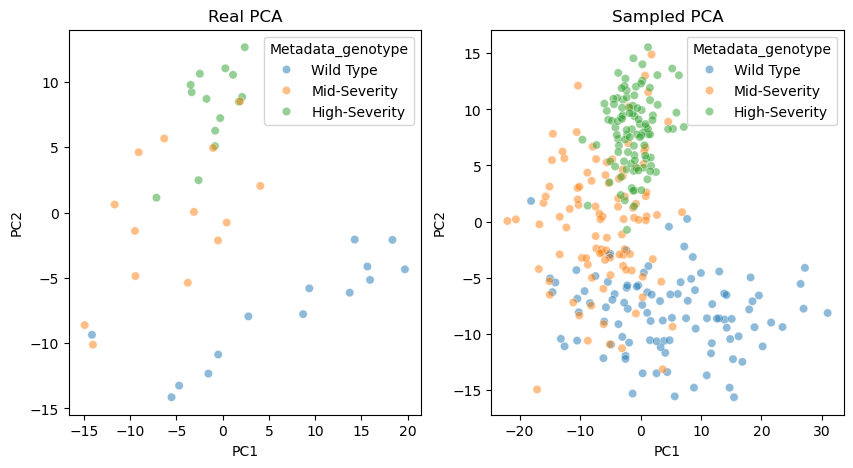

In [13]:
# Visualization of the last trial's sampled points

# annotate the genotypes of the sampled points
high_severity_sampled_points["Metadata_genotype"] = "High-Severity"
low_severity_sampled_points["Metadata_genotype"] = "Mid-Severity"
wt_sampled_points["Metadata_genotype"] = "Wild Type"
# concat the genotype sampled points
sampled_points = pd.concat(
    [wt_sampled_points, low_severity_sampled_points, high_severity_sampled_points]
)

# plot the first 2 PCA components from the actual data
# set up subplots
plt.figure(figsize=(10, 5))
# subplot 1
plt.subplot(1, 2, 1)
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=sum_aggregated_data_pca,
    hue="Metadata_genotype",
    alpha=0.5,
)
plt.title("Real PCA")

# plot the first 2 PCA components from the sampled data
# subplot 2
plt.subplot(1, 2, 2)
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=sampled_points,
    hue="Metadata_genotype",
    alpha=0.5,
)
plt.title("Sampled PCA")
plt.show()